In [2]:
import pandas as pd
import lightgbm as gbm

In [3]:
review = pd.read_csv('IMDB Dataset.csv')

In [4]:
review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
review['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
print('\n\nExample review:\n\n',review['review'].to_list()[5])
print('\n\nSentiment sentiment:\n\n',review['sentiment'].to_list()[5])
print('\n\nExample review:\n\n',review['review'].to_list()[6])
print('\n\nSentiment sentiment:\n\n',review['sentiment'].to_list()[6])



Example review:

 Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.


Sentiment sentiment:

 positive


Example review:

 I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new 

In [7]:
#stopwords library from nltk package
from nltk.corpus import stopwords
#extracting english stopwords frm nltk package
stop_words = set(stopwords.words('english'))
#converting Set stopwords to list
stop_word_list=list(stop_words)
#function for preprocessing our reviews
def preprocess_text(corpus):
    # converting everything into lower case
    corpus['review']=corpus['review'].str.lower()
    #removing urls from the reviews using regular expressions(regex)
    corpus['review']=corpus['review'].str.replace(r"http\S+", "", regex=True)
    #removing everything except alphabets and numbers from reviews
    corpus['review']=corpus['review'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
    #removing stopwords(frequently occuring words) like a, and, the , are which has no significance in our review analysis
    corpus['review']=corpus['review'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_word_list))
    return corpus

In [8]:
review_data = preprocess_text(review)

In [9]:
review_data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [10]:
#import nltk library
import nltk
#download wordnet and punkt package from nltk, it will be required for tokenization and lemmatization
nltk.download('wordnet')
nltk.download('punkt')
#intializing tokenizer object
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
#initializing lemmatizer object
lemmatizer=nltk.stem.WordNetLemmatizer()

#function for tokenizing and lemmatizing reviews
def lemmatize_text(review):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(review)]
#applying the above function
review_data['lemmatized_tokens']=review_data['review'].apply(lemmatize_text)
#viewing the updated reviews dataframe
review_data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sumaney\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sumaney\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,lemmatized_tokens
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, think, ..."
4,petter mattei love time money visually stunnin...,positive,"[petter, mattei, love, time, money, visually, ..."


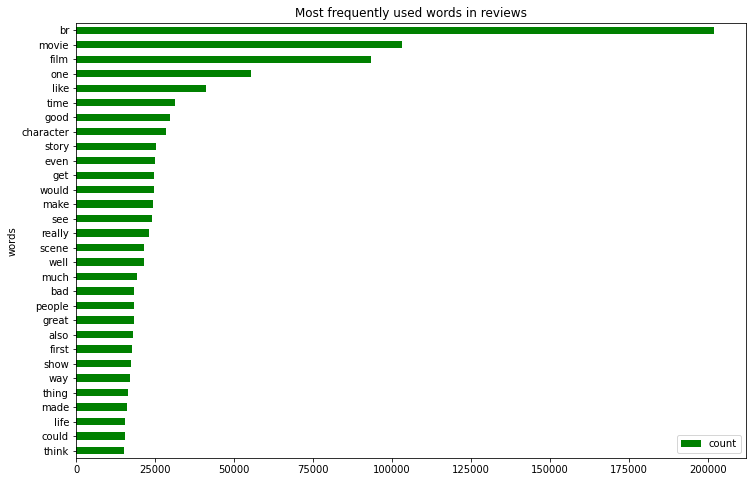

In [11]:
import itertools
import collections
import matplotlib.pyplot as plt

#Extracting tokenized and lemmatized reviews to a list
lemmatized_tokens=list(review_data['lemmatized_tokens'])
token_list=list(itertools.chain(*lemmatized_tokens))
count_no=collections.Counter(token_list)
clean_reviews=pd.DataFrame(count_no.most_common(30), columns=['words', 'count'])
fig, ax=plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Most frequently used words in reviews")
plt.show()

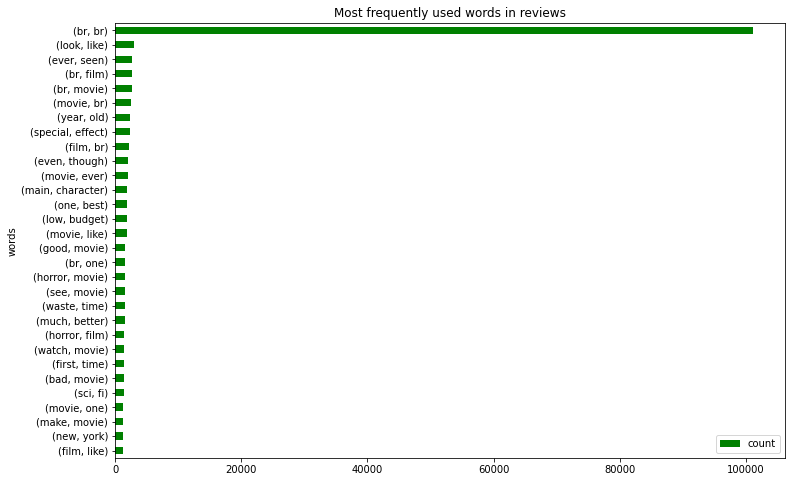

In [12]:
# Analyzing bigrams
bigrams=zip(token_list, token_list[1:])
count_no= collections. Counter(bigrams)

clean_reviews=pd.DataFrame(count_no.most_common(30), columns=['words', 'count'])
fig, ax=plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Most frequently used words in reviews")
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=2000)
#extracting features using tfidf in array format
features=tfidf_vectorizer.fit_transform(review_data['review']).toarray()

In [14]:
review_data = preprocess_text(review)

In [15]:
#import model library
import lightgbm as lgb
#import train test split module
from sklearn.model_selection import train_test_split
#import libraries for model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#outputs
target=review_data['sentiment']
#splitting training data to train and test
x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.25)
#initializing model with hyperparameters, read documentation of the model for more details on hyperparameters
clf=lgb.LGBMClassifier(max_depth=20, n_estimators=25, min_child_weight=0.0016, n_jobs=-1)
#apply the training input and output for model to learn 
clf.fit(x_train, y_train)

LGBMClassifier(max_depth=20, min_child_weight=0.0016, n_estimators=25)

In [16]:
#run prediction on trained model with test data
pred=clf.predict(x_test)
print("Test data accuracy is: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Test data accuracy is:  0.80256
              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      6223
    positive       0.79      0.83      0.81      6277

    accuracy                           0.80     12500
   macro avg       0.80      0.80      0.80     12500
weighted avg       0.80      0.80      0.80     12500



In [17]:
clf.score(x_test,y_test)

0.80256